In [40]:
'''
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed',
                                    'services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course',
                            'university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')

# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output 
     target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after 
     the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be 
     discarded if the intention is to have a realistic predictive model.

# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means 
     client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
'''

"\n# bank client data:\n1 - age (numeric)\n2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed',\n                                    'services','student','technician','unemployed','unknown')\n3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)\n4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course',\n                            'university.degree','unknown')\n5 - default: has credit in default? (categorical: 'no','yes','unknown')\n6 - housing: has housing loan? (categorical: 'no','yes','unknown')\n7 - loan: has personal loan? (categorical: 'no','yes','unknown')\n\n# related with the last contact of the current campaign:\n8 - contact: contact communication type (categorical: 'cellular','telephone')\n9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'de

In [41]:
### Definitions:

'''
Euribor is short for Euro Interbank Offered Rate. The Euribor rates are based on the average interest rates 
at which a large panel of European banks borrow funds from one another. There are different maturities, 
ranging from one week to one year.

The Euribor rates are considered to be the most important reference rates in the European money market. 
The interest rates do provide the basis for the price and interest rates of all kinds of financial products 
like interest rate swaps, interest rate futures, saving accounts and mortgages. That’s the exact reason 
why many professionals as well as individuals do monitor the development of the Euribor rates intensively.

-----

Consumer confidence index provides an indication of future developments of households' consumption and saving, 
based upon answers regarding their expected financial situation, their sentiment about the general economic 
situation, unemployment and capability of savings


'''

"\nEuribor is short for Euro Interbank Offered Rate. The Euribor rates are based on the average interest rates \nat which a large panel of European banks borrow funds from one another. There are different maturities, \nranging from one week to one year.\n\nThe Euribor rates are considered to be the most important reference rates in the European money market. \nThe interest rates do provide the basis for the price and interest rates of all kinds of financial products \nlike interest rate swaps, interest rate futures, saving accounts and mortgages. That’s the exact reason \nwhy many professionals as well as individuals do monitor the development of the Euribor rates intensively.\n\n-----\n\nConsumer confidence index provides an indication of future developments of households' consumption and saving, \nbased upon answers regarding their expected financial situation, their sentiment about the general economic \nsituation, unemployment and capability of savings\n\n\n"

In [42]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import os
import seaborn as sns
import re

In [43]:
# Connect to google drive
in_colab = False

try:
    from google.colab import drive
    drive.mount('/content/drive')
    os.chdir("/content/drive/My Drive/Capstone/Project_2")
    in_colab = True
except:
    pass

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
filepath = "Data/bank-additional-full.csv"
raw_df = pd.read_csv(filepath)

In [45]:
raw_df.head()

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."


In [46]:
raw_df.shape

(41188, 1)

Need to format the dataframe to get it into a tabular form

In [47]:
raw_df.columns

Index(['age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"'], dtype='object')

In [48]:
raw_df.head(2)

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."


In [49]:
#Initial cleaning to get the data into right tabular form 
def clean_data(raw_df):

    df = raw_df.copy()
    col_names = df.columns
    col_lst = col_names.tolist()[0].split(';')
    col_lst = [re.sub(r'\W+', '', x) for x in col_lst]
    df.columns = ['all']
    new_row_lst = df['all'].str.split(";").to_list()
    formatted_df = pd.DataFrame(new_row_lst, columns = col_lst)

    formatted_df = formatted_df.applymap(lambda x: x.replace('"', ''))
    formatted_df['education'] = formatted_df['education'].apply(lambda x: x.replace('.', ' '))

    float_cols = ['empvarrate', 'conspriceidx', 'consconfidx',
       'euribor3m', 'nremployed']

    int_cols = ['age', 'duration',  'pdays', 'campaign',
       'previous']

    formatted_df[float_cols] = formatted_df[float_cols].astype(float)
    formatted_df[int_cols] = formatted_df[int_cols].astype(int)
    
    #shifting pdays by an increment of 1
    formatted_df['pdays'] = [x+1 for x in formatted_df['pdays']]
    #replace 999 by 0
    formatted_df['pdays'] = [0 if x == 1000 else x for x in formatted_df['pdays']]

    formatted_df.y = formatted_df.y.map({'yes': 1, 'no' : 0})


    return formatted_df

In [50]:
formatted_df = clean_data(raw_df)
#print(formatted_df.columns)

formatted_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,y
0,56,housemaid,married,basic 4y,no,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high school,unknown,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high school,no,yes,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic 6y,no,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high school,no,no,yes,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [51]:
formatted_df.describe()

,age,duration,campaign,pdays,previous,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,0.258012,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,1.510327,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,0.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,0.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,0.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,28.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [52]:
formatted_df.to_csv("Data/formatted_df.csv", index = False)

In [53]:
formatted_df= pd.read_csv("Data/formatted_df.csv")
formatted_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,y
0,56,housemaid,married,basic 4y,no,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high school,unknown,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high school,no,yes,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic 6y,no,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high school,no,no,yes,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [54]:
formatted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           41188 non-null  int64  
 1   job           41188 non-null  object 
 2   marital       41188 non-null  object 
 3   education     41188 non-null  object 
 4   default       41188 non-null  object 
 5   housing       41188 non-null  object 
 6   loan          41188 non-null  object 
 7   contact       41188 non-null  object 
 8   month         41188 non-null  object 
 9   day_of_week   41188 non-null  object 
 10  duration      41188 non-null  int64  
 11  campaign      41188 non-null  int64  
 12  pdays         41188 non-null  int64  
 13  previous      41188 non-null  int64  
 14  poutcome      41188 non-null  object 
 15  empvarrate    41188 non-null  float64
 16  conspriceidx  41188 non-null  float64
 17  consconfidx   41188 non-null  float64
 18  euribor3m     41188 non-nu

### Distribution of numeric variables 

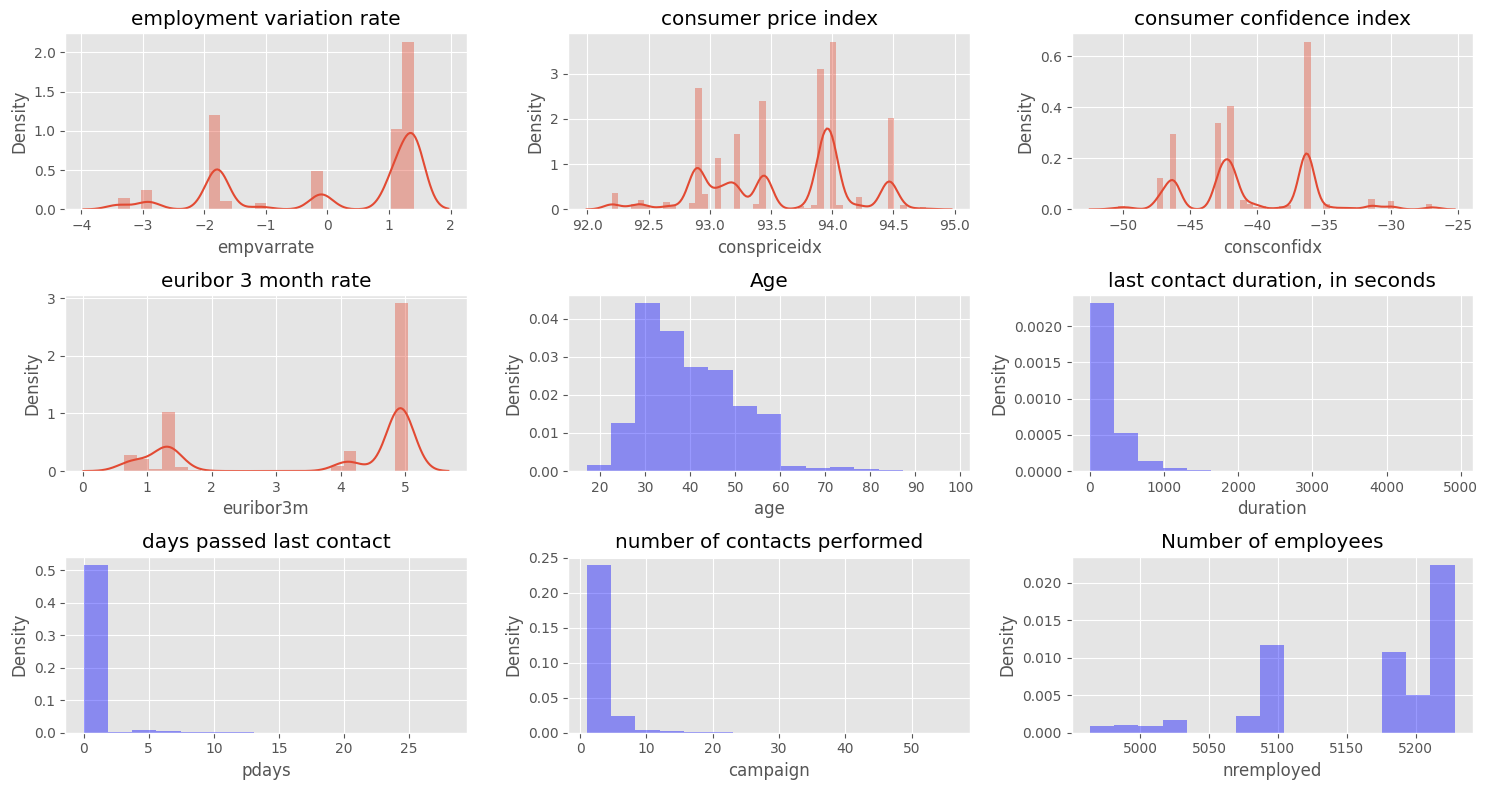

In [55]:
import warnings
warnings.filterwarnings("ignore")

fig, axes = plt.subplots(3, 3, figsize=(15, 8), sharey=False, tight_layout=True)

sns.distplot(formatted_df['empvarrate'], ax=axes[0, 0])
axes[0, 0].set_title("employment variation rate")

sns.distplot(formatted_df['conspriceidx'], ax=axes[0, 1])
axes[0, 1].set_title("consumer price index")

sns.distplot(formatted_df['consconfidx'], ax=axes[0, 2])
axes[0, 2].set_title("consumer confidence index")

sns.distplot(formatted_df['euribor3m'], ax=axes[1, 0])
axes[1, 0].set_title("euribor 3 month rate")

sns.histplot(formatted_df['age'], ax=axes[1, 1],
             stat="density", bins=15, color = 'blue', alpha=0.4, edgecolor='none')
axes[1, 1].set_title("Age")

sns.histplot(formatted_df['duration'], ax=axes[1, 2], 
             stat="density", bins=15, color = 'blue', alpha=0.4, edgecolor='none')
axes[1, 2].set_title("last contact duration, in seconds")

sns.histplot(formatted_df[formatted_df['pdays'] != 999]['pdays'], ax=axes[2, 0],
             stat="density", bins=15, color = 'blue', alpha=0.4, edgecolor='none')
axes[2, 0].set_title("days passed last contact")

sns.histplot(formatted_df['campaign'], ax=axes[2, 1],
             stat="density", bins=15, color = 'blue', alpha=0.4, edgecolor='none')
axes[2, 1].set_title("number of contacts performed")

sns.histplot(formatted_df['nremployed'], ax=axes[2, 2],
             stat="density", bins=15, color = 'blue', alpha=0.4, edgecolor='none')
axes[2, 2].set_title("Number of employees")

# plt.savefig("distributions.png", dpi=100)
plt.show()

Checking the distribution of the numeric variables by the outcome of the campaign

In [56]:
successful_df = formatted_df[formatted_df['y'] == 1]
unsuccessful_df = formatted_df[formatted_df['y'] == 0]

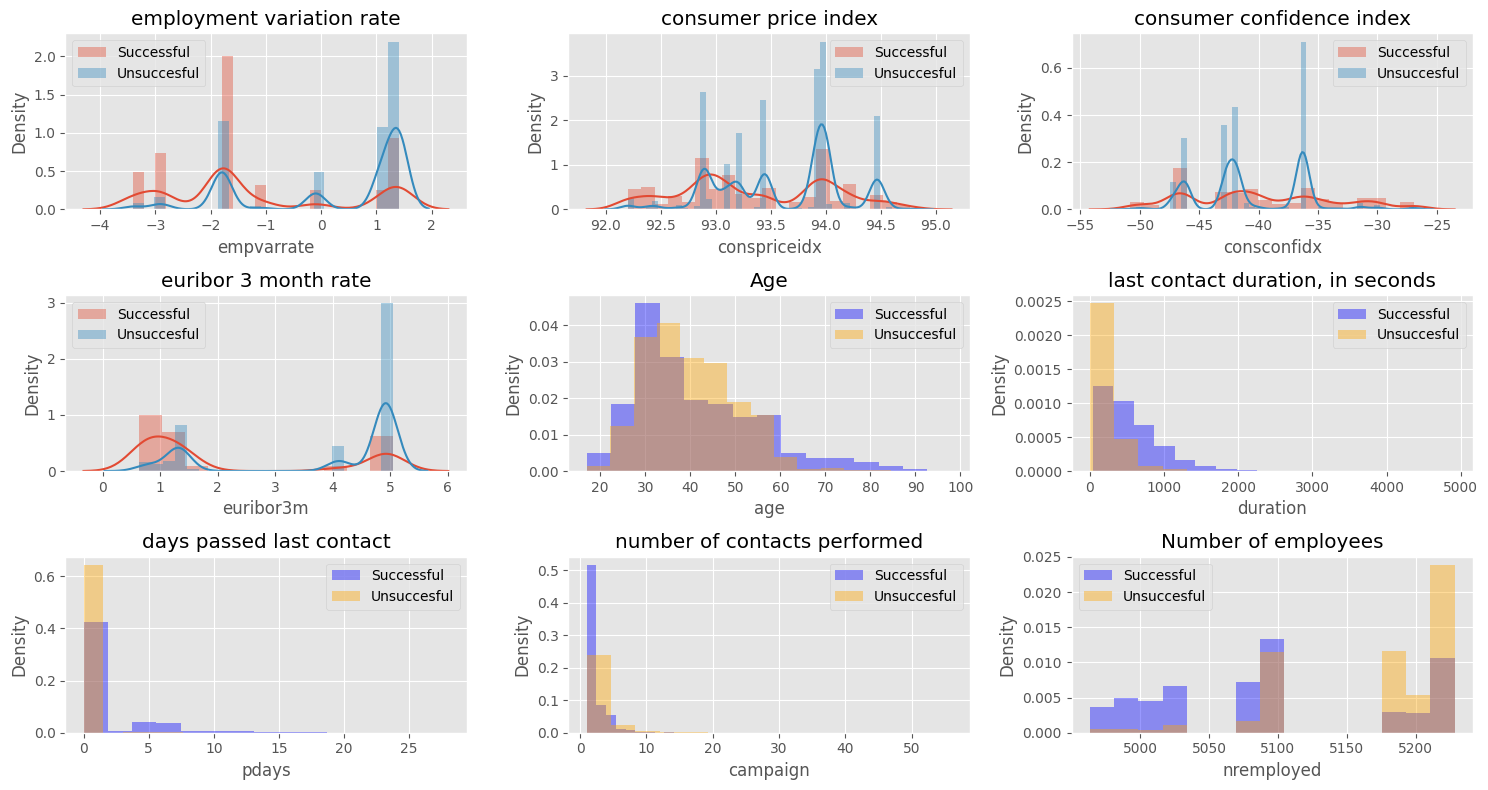

In [57]:
import warnings
warnings.filterwarnings("ignore")

fig, axes = plt.subplots(3, 3, figsize=(15, 8), sharey=False, tight_layout=True)

sns.distplot(successful_df['empvarrate'], ax=axes[0, 0], label='Successful')
sns.distplot(unsuccessful_df['empvarrate'], ax=axes[0, 0], label='Unsuccesful')
axes[0, 0].set_title("employment variation rate")
axes[0, 0].legend()

sns.distplot(successful_df['conspriceidx'], ax=axes[0, 1], label='Successful')
sns.distplot(unsuccessful_df['conspriceidx'], ax=axes[0, 1], label='Unsuccesful')
axes[0, 1].set_title("consumer price index")
axes[0, 1].legend()

sns.distplot(successful_df['consconfidx'], ax=axes[0, 2], label='Successful')
sns.distplot(unsuccessful_df['consconfidx'], ax=axes[0, 2], label='Unsuccesful')
axes[0, 2].set_title("consumer confidence index")
axes[0, 2].legend()

sns.distplot(successful_df['euribor3m'], ax=axes[1, 0], label='Successful')
sns.distplot(unsuccessful_df['euribor3m'], ax=axes[1, 0], label='Unsuccesful')
axes[1, 0].set_title("euribor 3 month rate")
axes[1, 0].legend()

sns.histplot(successful_df['age'], ax=axes[1, 1], label='Successful', 
             stat="density", bins=15, color = 'blue', alpha=0.4, edgecolor='none')
sns.histplot(unsuccessful_df['age'], ax=axes[1, 1], label='Unsuccesful', 
             stat="density", bins=15, color='orange', alpha=0.4, edgecolor='none')
axes[1, 1].set_title("Age")
axes[1, 1].legend()

sns.histplot(successful_df['duration'], ax=axes[1, 2], label='Successful', 
             stat="density", bins=15, color = 'blue', alpha=0.4, edgecolor='none')
sns.histplot(unsuccessful_df['duration'], ax=axes[1, 2], label='Unsuccesful', 
             stat="density", bins=15, color='orange', alpha=0.4, edgecolor='none')
axes[1, 2].set_title("last contact duration, in seconds")
axes[1, 2].legend()

sns.histplot(successful_df[successful_df['pdays'] != 999]['pdays'], ax=axes[2, 0], label='Successful', 
             stat="density", bins=15, color = 'blue', alpha=0.4, edgecolor='none')
sns.histplot(unsuccessful_df[unsuccessful_df['pdays'] != 999]['pdays'], ax=axes[2, 0], label='Unsuccesful', 
             stat="density", bins=15, color='orange', alpha=0.4, edgecolor='none')
axes[2, 0].set_title("days passed last contact")
axes[2, 0].legend()

sns.histplot(successful_df['campaign'], ax=axes[2, 1], label='Successful', 
             stat="density", bins=15, color = 'blue', alpha=0.4, edgecolor='none')
sns.histplot(unsuccessful_df['campaign'], ax=axes[2, 1], label='Unsuccesful', 
             stat="density", bins=15, color='orange', alpha=0.4, edgecolor='none')
axes[2, 1].set_title("number of contacts performed")
axes[2, 1].legend()

sns.histplot(successful_df['nremployed'], ax=axes[2, 2], label='Successful', 
             stat="density", bins=15, color = 'blue', alpha=0.4, edgecolor='none')
sns.histplot(unsuccessful_df['nremployed'], ax=axes[2, 2], label='Unsuccesful', 
             stat="density", bins=15, color='orange', alpha=0.4, edgecolor='none')
axes[2, 2].set_title("Number of employees")
axes[2, 2].legend()

# plt.savefig("distributions.png", dpi=100)
plt.show()

### EDA on Categorical Variables

In [58]:
cat_cols = []
for avar in formatted_df.columns:
  if formatted_df[avar].dtype == 'object':
    print("The unique values for ", avar, "is: ", formatted_df[avar].unique())
    print("The count for each category: \n", formatted_df[avar].value_counts())
    print("\n")
    cat_cols.append(avar)

The unique values for  job is:  ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
The count for each category: 
 admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


The unique values for  marital is:  ['married' 'single' 'divorced' 'unknown']
The count for each category: 
 married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64


The unique values for  education is:  ['basic 4y' 'high school' 'basic 6y' 'basic 9y' 'professional course'
 'unknown' 'university degree' 'illiterate']
The count for each category: 
 university degree      12168
high school             9515
basic 9y                6045
pro

In [59]:
counts = pd.DataFrame(formatted_df.groupby('job')['y'].value_counts()).rename(columns={'y':"count"})
counts = counts.reset_index()
counts.head()

,job,y,count
0,admin.,0,9070
1,admin.,1,1352
2,blue-collar,0,8616
3,blue-collar,1,638
4,entrepreneur,0,1332


In [60]:
totals = pd.DataFrame(counts.groupby('job')['count'].sum()).rename(columns={'count': 'total'})
totals = totals.reset_index()
totals.head()

,job,total
0,admin.,10422
1,blue-collar,9254
2,entrepreneur,1456
3,housemaid,1060
4,management,2924


In [61]:
counts = counts.merge(totals, how='left', on='job')
counts.head()

,job,y,count,total
0,admin.,0,9070,10422
1,admin.,1,1352,10422
2,blue-collar,0,8616,9254
3,blue-collar,1,638,9254
4,entrepreneur,0,1332,1456


In [62]:
yes = counts[counts['y'] == 1].copy()
yes = yes.reset_index(drop=True)
yes = yes.drop('y', axis=1)
yes = yes.rename(columns={"count": 'yes'})

full = yes.copy()
full['no'] = full['total'] - full['yes']
full = full[['job', 'yes', 'no', 'total']]
full['yes_%'] = (full['yes'] / full['total'])*100
full = full.round({'yes_%': 1}).sort_values("yes_%", ascending=False)
full.head()

,job,yes,no,total,yes_%
8,student,275,600,875,31.4
5,retired,434,1286,1720,25.2
10,unemployed,144,870,1014,14.2
0,admin.,1352,9070,10422,13.0
4,management,328,2596,2924,11.2


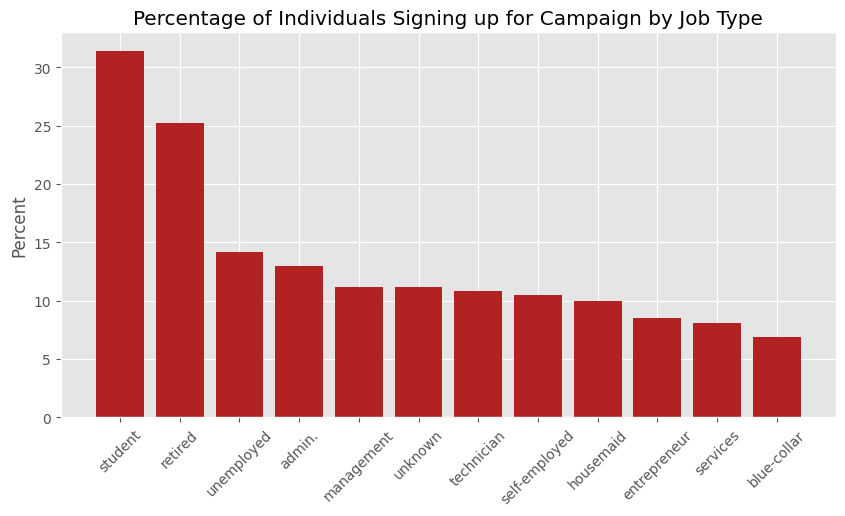

In [63]:
plt.style.use("ggplot")
plt.figure(figsize=(10,5))

plt.bar(full['job'], full['yes_%'], color='firebrick')
plt.xticks(rotation=45)
plt.title("Percentage of Individuals Signing up for Campaign by Job Type")
plt.ylabel("Percent")
# plt.savefig("campaign_success_by_job.png", dpi=100, bbox_inches="tight")
plt.show()

#### Distribution of Categorical variables

In [64]:
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

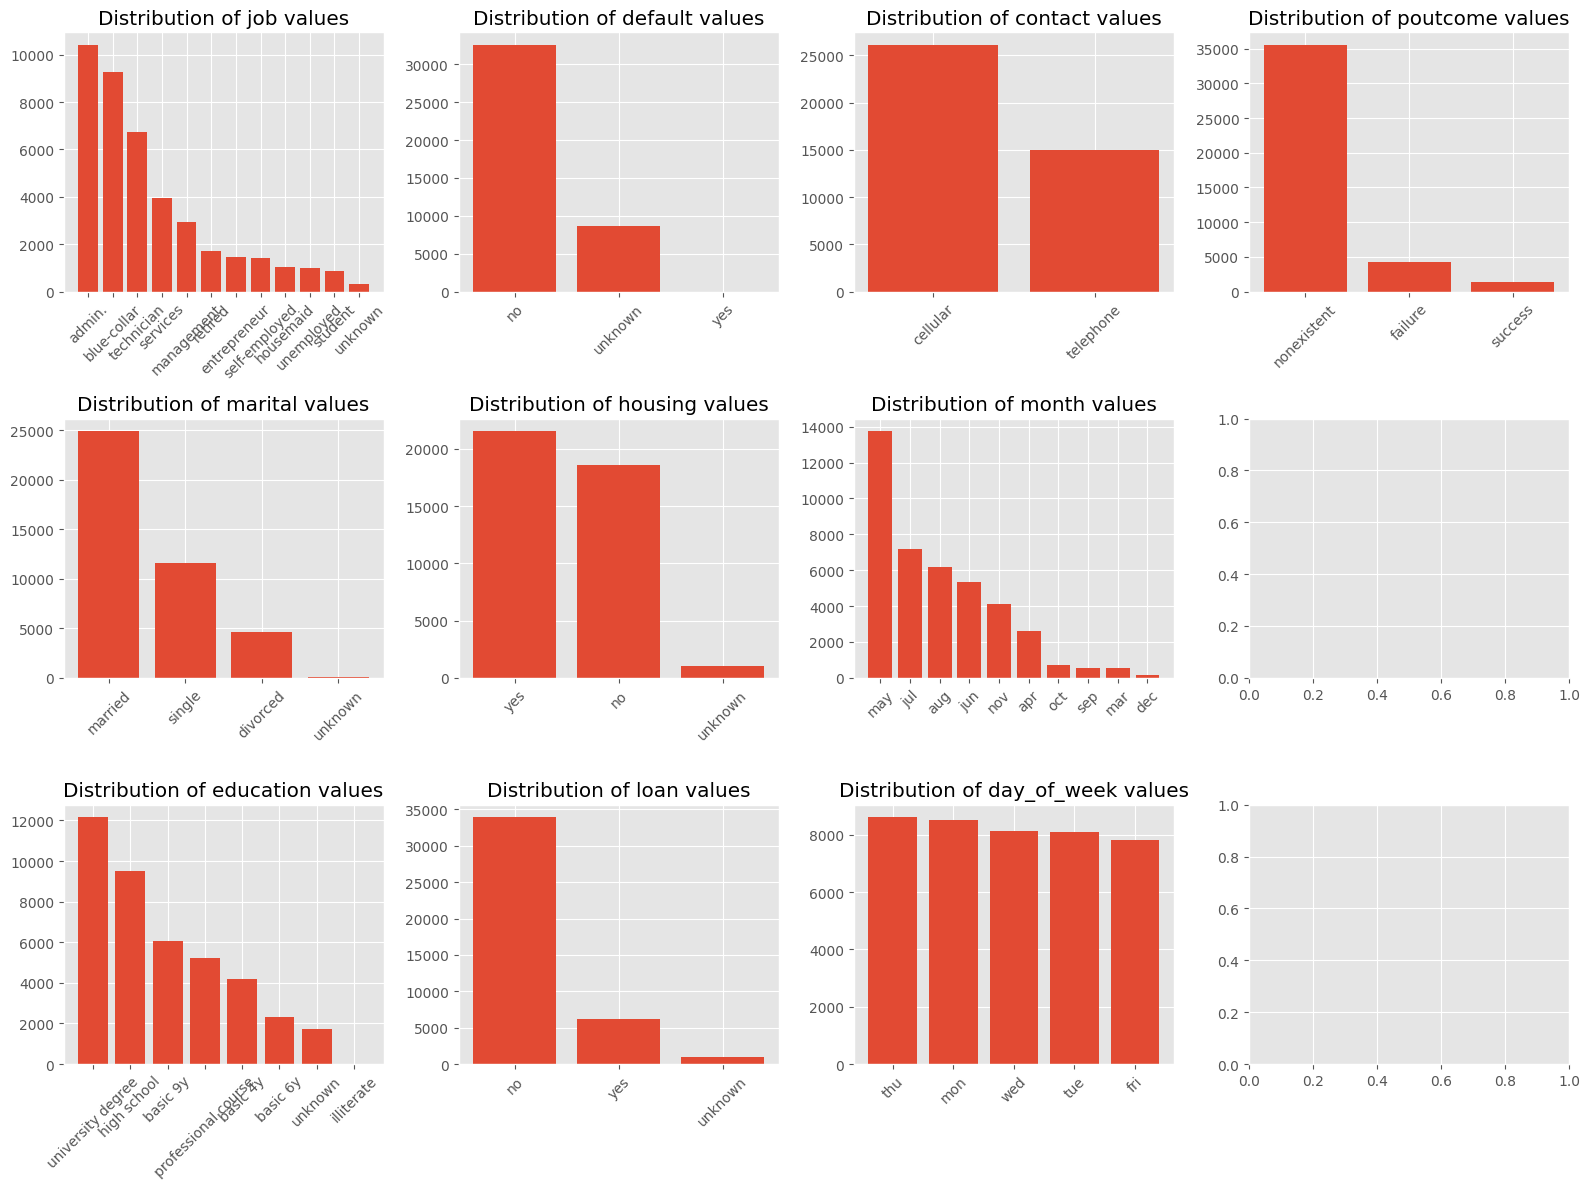

In [65]:
fig, ax = plt.subplots(3, 4, figsize=(16,12), tight_layout=True)

i = 0
j = 0
for col in cat_cols:

    ax[i, j].bar(formatted_df[col].value_counts().index, formatted_df[col].value_counts())
    ax[i, j].set_xticklabels(formatted_df[col].value_counts().index, rotation=45)
    ax[i, j].set_title(f"Distribution of {col} values")
    
    i += 1
    if i > 2:
        i = 0
        j +=1

plt.show()

Since there are a substantial number of unknown values for most categorical variables, we need to come up with a strategy from:
1. Drop unknown values
2. Treating unknowns as a unique category in itself
3. Unknown value imputation 

#### Strategy: Drop the rows with an 'unknown' value in them

In [66]:
df_copy = formatted_df.copy()
no_unknowns = df_copy.replace('unknown',np.nan).dropna(axis = 0, how = 'any')

no_unknowns.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,y
0,56,housemaid,married,basic 4y,no,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high school,no,yes,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic 6y,no,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high school,no,no,yes,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
6,59,admin.,married,professional course,no,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [67]:
print("total samples remaining after dropping unknowns: ", no_unknowns.shape[0])

total samples remaining after dropping unknowns:  30488


In [68]:
print(f"Percent of rows remaining after dropping unknowns: {np.round(len(no_unknowns) / len(formatted_df)*100, 1)}%")

Percent of rows remaining after dropping unknowns: 74.0%


Correlation between features 

<Axes: >

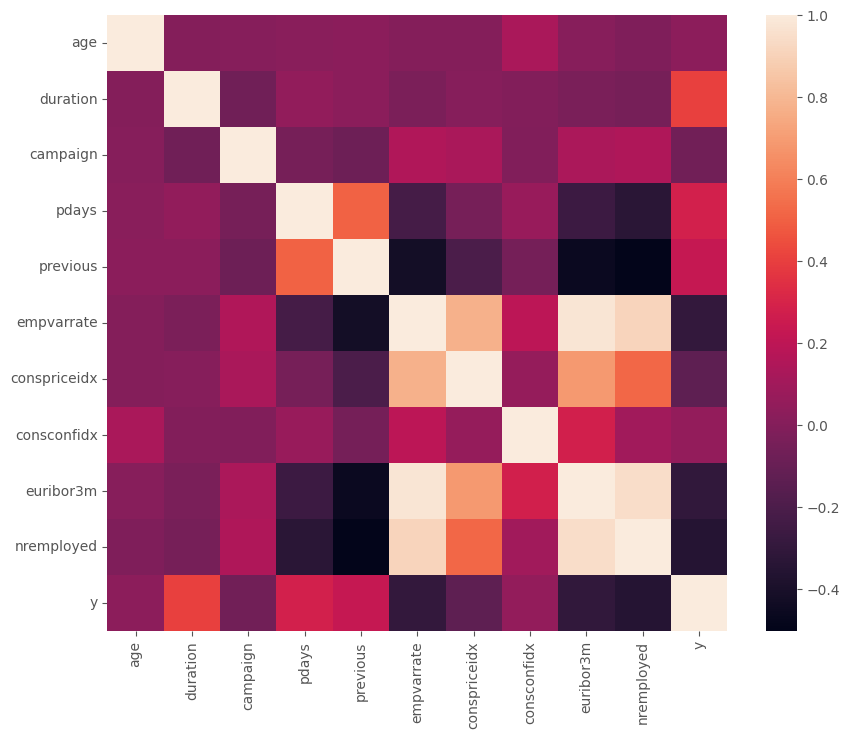

In [69]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(formatted_df.corr())

In [70]:
corr = formatted_df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,age,duration,campaign,pdays,previous,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,y
age,1.00,-0.00,0.00,0.02,0.02,-0.00,0.00,0.13,0.01,-0.02,0.03
duration,-0.00,1.00,-0.07,0.05,0.02,-0.03,0.01,-0.01,-0.03,-0.04,0.41
campaign,0.00,-0.07,1.00,-0.04,-0.08,0.15,0.13,-0.01,0.14,0.14,-0.07
pdays,0.02,0.05,-0.04,1.00,0.51,-0.23,-0.05,0.07,-0.26,-0.34,0.28
previous,0.02,0.02,-0.08,0.51,1.00,-0.42,-0.20,-0.05,-0.45,-0.50,0.23
empvarrate,-0.00,-0.03,0.15,-0.23,-0.42,1.00,0.78,0.20,0.97,0.91,-0.30
conspriceidx,0.00,0.01,0.13,-0.05,-0.20,0.78,1.00,0.06,0.69,0.52,-0.14
consconfidx,0.13,-0.01,-0.01,0.07,-0.05,0.20,0.06,1.00,0.28,0.10,0.05
euribor3m,0.01,-0.03,0.14,-0.26,-0.45,0.97,0.69,0.28,1.00,0.95,-0.31
nremployed,-0.02,-0.04,0.14,-0.34,-0.50,0.91,0.52,0.10,0.95,1.00,-0.35


Correlation matrix only involved numeric features

Most postive correlations with y: 'duration', followed by 'pdays' and 'previous'

Most negative correlations with y: 'nremployed', 'euribor3m', 'empvarrate'

The top 3 corelated features: duration, nremployed, euribor3m

In [71]:
sns.pairplot(data = formatted_df, hue = 'y')

Output hidden; open in https://colab.research.google.com to view.